# A Comprehensive Tutorial for Matplotlib and Seaborn

This notebook provides a comprehensive tutorial on Matplotlib and Seaborn, complete with a synthetic dataset, code examples, and descriptions for over 25 plots, ranging from basic to advanced and innovative.

### Introduction to Data Visualization with Matplotlib and Seaborn

**Matplotlib** is the foundational plotting library for the Python scientific computing ecosystem. It provides a low-level interface for creating a wide variety of static, animated, and interactive visualizations. Its strength lies in its flexibility and control over every aspect of a figure.

**Seaborn**, built on top of Matplotlib, offers a higher-level interface for drawing attractive and informative statistical graphics. It is particularly well-suited for exploring and understanding data, as it can create complex plots with just a few lines of code, often integrating statistical aggregation and visualization seamlessly.

This tutorial will guide you through creating numerous plots, showcasing the strengths of both libraries.

### 1. Setup and Synthetic Dataset Generation

First, let's install the necessary libraries and create a synthetic dataset. This dataset will simulate sales data for a fictional company, providing a rich source for our visualizations.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Set the style for seaborn plots
sns.set_theme(style="whitegrid")

# Generate a synthetic dataset
np.random.seed(42)
num_samples = 500

data = {
    'Date': pd.to_datetime(np.random.choice(pd.to_datetime(['2023-01-15', '2023-02-20', '2023-03-10']), num_samples)),
    'Product_Category': np.random.choice(['Electronics', 'Clothing', 'Home Goods', 'Books'], num_samples),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], num_samples),
    'Units_Sold': np.random.randint(1, 100, size=num_samples),
    'Unit_Price': np.random.choice([19.99, 29.99, 49.99, 99.99, 149.99], num_samples),
    'Customer_Satisfaction': np.random.uniform(1, 5, size=num_samples).round(1),
}

df = pd.DataFrame(data)

# Create calculated columns
df['Total_Sales'] = df['Units_Sold'] * df['Unit_Price']
df['Profit_Margin'] = np.random.uniform(0.1, 0.4, size=num_samples)
df['Profit'] = df['Total_Sales'] * df['Profit_Margin']

# Introduce some correlation
df['Marketing_Spend'] = df['Total_Sales'] * np.random.uniform(0.1, 0.2) + np.random.normal(0, 50, num_samples)
df.loc[df['Product_Category'] == 'Electronics', 'Total_Sales'] *= 1.5
df.loc[df['Region'] == 'East', 'Total_Sales'] *= 1.2

df.head()

,Date,Product_Category,Region,Units_Sold,Unit_Price,Customer_Satisfaction,Total_Sales,Profit_Margin,Profit,Marketing_Spend
0,2023-03-10,Clothing,East,71,29.99,4.4,2555.148,0.338197,720.119309,376.246436
1,2023-01-15,Clothing,East,1,149.99,3.7,179.988,0.249177,37.374025,8.048884
2,2023-03-10,Home Goods,North,96,49.99,4.2,4799.040,0.201933,969.085703,720.300050
3,2023-03-10,Clothing,North,13,19.99,4.1,259.870,0.361641,93.979571,5.439060
4,2023-01-15,Books,South,94,19.99,1.6,1879.060,0.263454,495.046489,289.748277


## Matplotlib Tutorial: The Foundation of Python Plotting

Matplotlib provides the building blocks for creating visualizations. We'll start with the basics and move to more customized and multi-dimensional plots.

#### 1. Line Plot

*   **Description:** A line plot connects a series of data points with a continuous line. It's excellent for visualizing data that changes over time.
*   **Characteristics:** Shows trends, patterns, and fluctuations. The x-axis typically represents a continuous variable like time.
*   **Use Case:** Tracking stock prices, monthly sales figures, or temperature changes over a period.

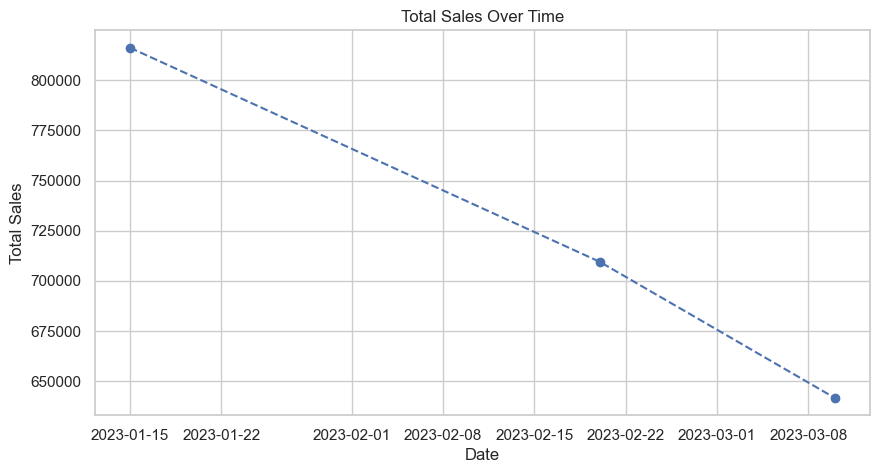

In [3]:
# Prepare data for time series plot
daily_sales = df.groupby('Date')['Total_Sales'].sum().reset_index()
daily_sales = daily_sales.sort_values('Date')

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(daily_sales['Date'], daily_sales['Total_Sales'], marker='o', linestyle='--')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

#### 2. Bar Chart

*   **Description:** A bar chart uses rectangular bars to represent categorical data. The length of the bar is proportional to the value it represents.
*   **Characteristics:** Compares values across different categories.
*   **Use Case:** Comparing sales figures across different product categories or regions.

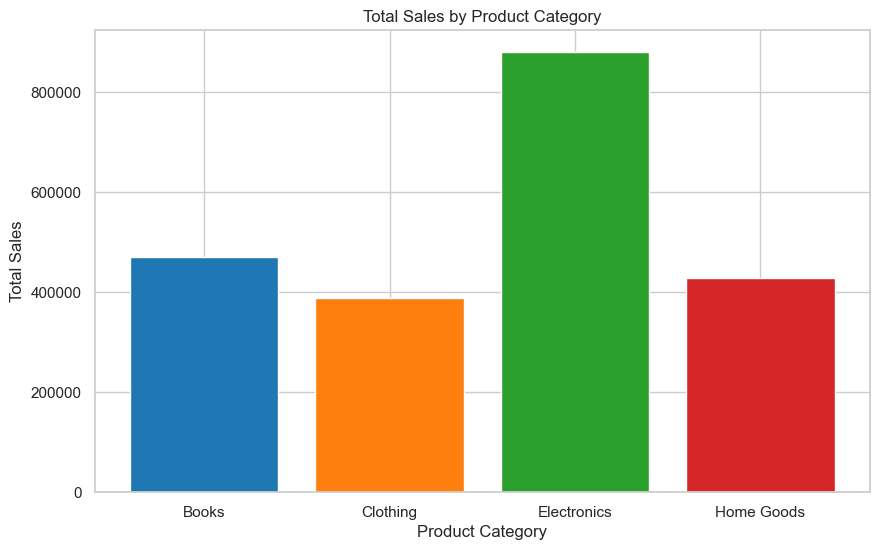

In [5]:
# Prepare data
category_sales = df.groupby('Product_Category')['Total_Sales'].sum().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(category_sales['Product_Category'], category_sales['Total_Sales'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

#### 3. Histogram

*   **Description:** A histogram represents the distribution of a single numerical variable by dividing the data into "bins" of equal width and showing the frequency of observations in each bin.
*   **Characteristics:** Visualizes the underlying frequency distribution (shape) of a set of continuous or discrete data.
*   **Use Case:** Understanding the distribution of customer satisfaction scores, exam results, or employee ages.

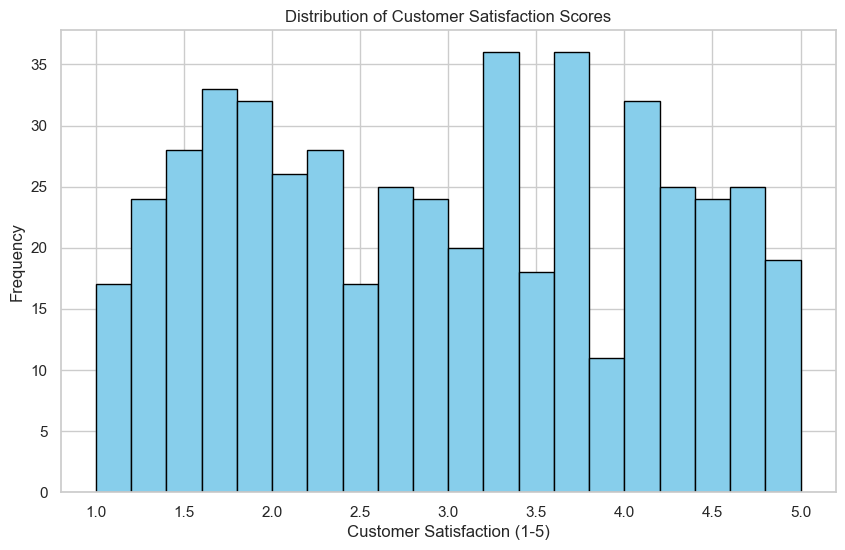

In [7]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(df['Customer_Satisfaction'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Satisfaction Scores')
plt.xlabel('Customer Satisfaction (1-5)')
plt.ylabel('Frequency')
plt.show()

#### 4. Scatter Plot

*   **Description:** A scatter plot displays values for two numerical variables, showing each observation as a point.
*   **Characteristics:** Ideal for visualizing the relationship or correlation between two variables.
*   **Use Case:** Examining the relationship between marketing spend and total sales, or a student's study hours versus their exam score.

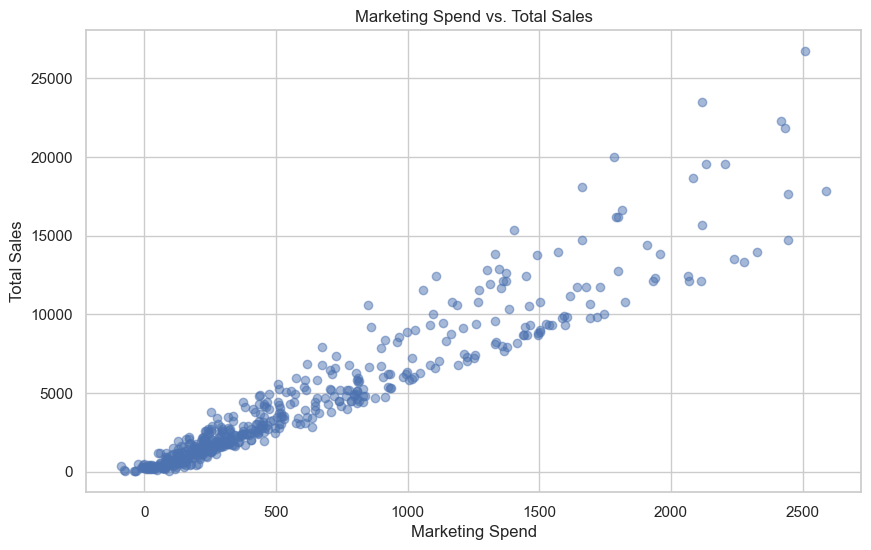

In [9]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Marketing_Spend'], df['Total_Sales'], alpha=0.5)
plt.title('Marketing Spend vs. Total Sales')
plt.xlabel('Marketing Spend')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

#### 5. Pie Chart

*   **Description:** A pie chart is a circular statistical graphic divided into slices to illustrate numerical proportion.
*   **Characteristics:** Shows the composition or percentage distribution of a whole. Best used for a small number of categories.
*   **Use Case:** Displaying market share of different companies or the proportion of a budget spent on different categories.

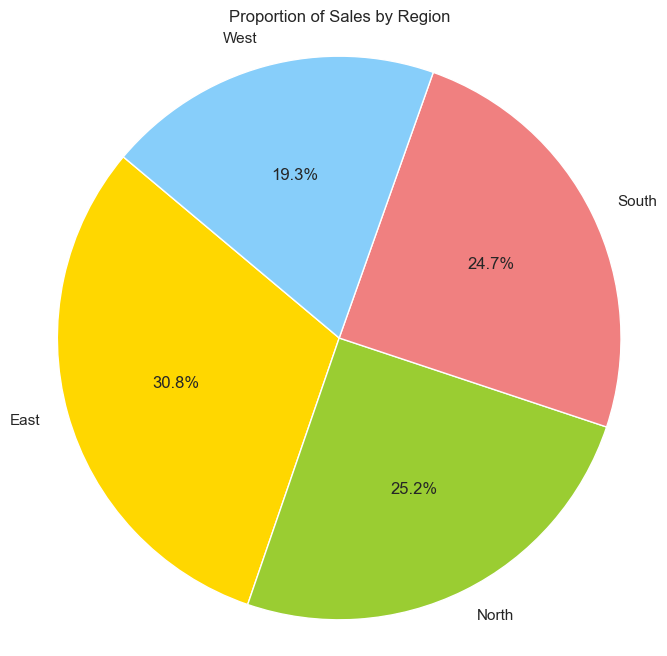

In [11]:
# Prepare data
region_sales = df.groupby('Region')['Total_Sales'].sum()

# Create the plot
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
plt.title('Proportion of Sales by Region')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### 6. Stacked Bar Chart

*   **Description:** A stacked bar chart segments the bars of a standard bar chart to represent different sub-categories within each main category.
*   **Characteristics:** Compares both the total value across categories and the breakdown of that total.
*   **Use Case:** Showing total sales per region, with segments of each bar representing different product categories.

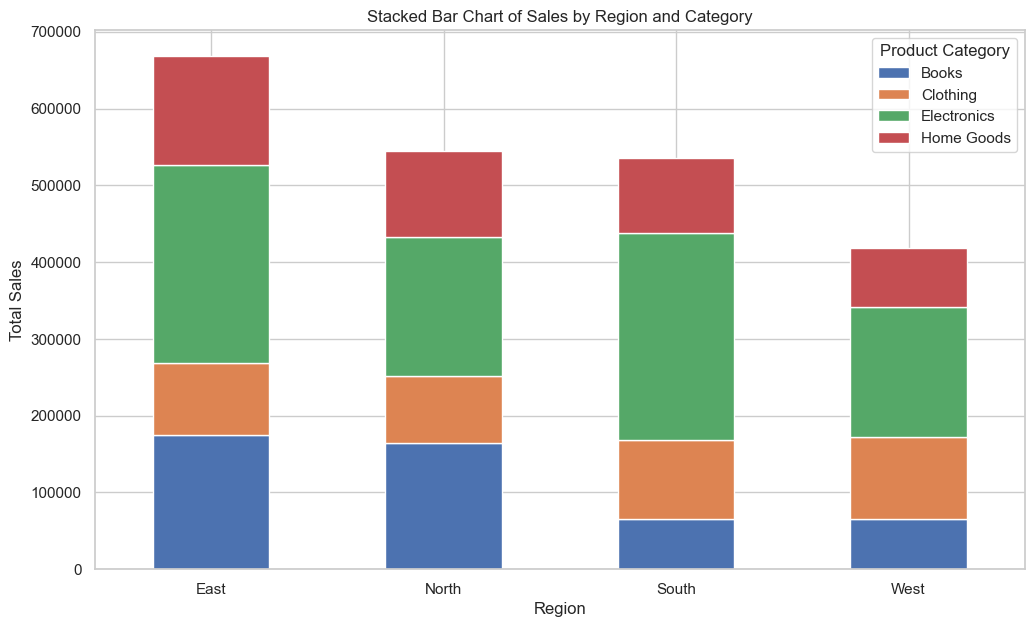

In [13]:
# Prepare data
region_category_sales = df.groupby(['Region', 'Product_Category'])['Total_Sales'].sum().unstack()

# Create the plot
region_category_sales.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Stacked Bar Chart of Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.show()

#### 7. Subplots

*   **Description:** Matplotlib's subplot functionality allows you to place multiple plots within a single figure.
*   **Characteristics:** Creates a grid of axes for displaying several related visualizations together.
*   **Use Case:** Comparing the distribution of sales, profits, and units sold in one consolidated view.

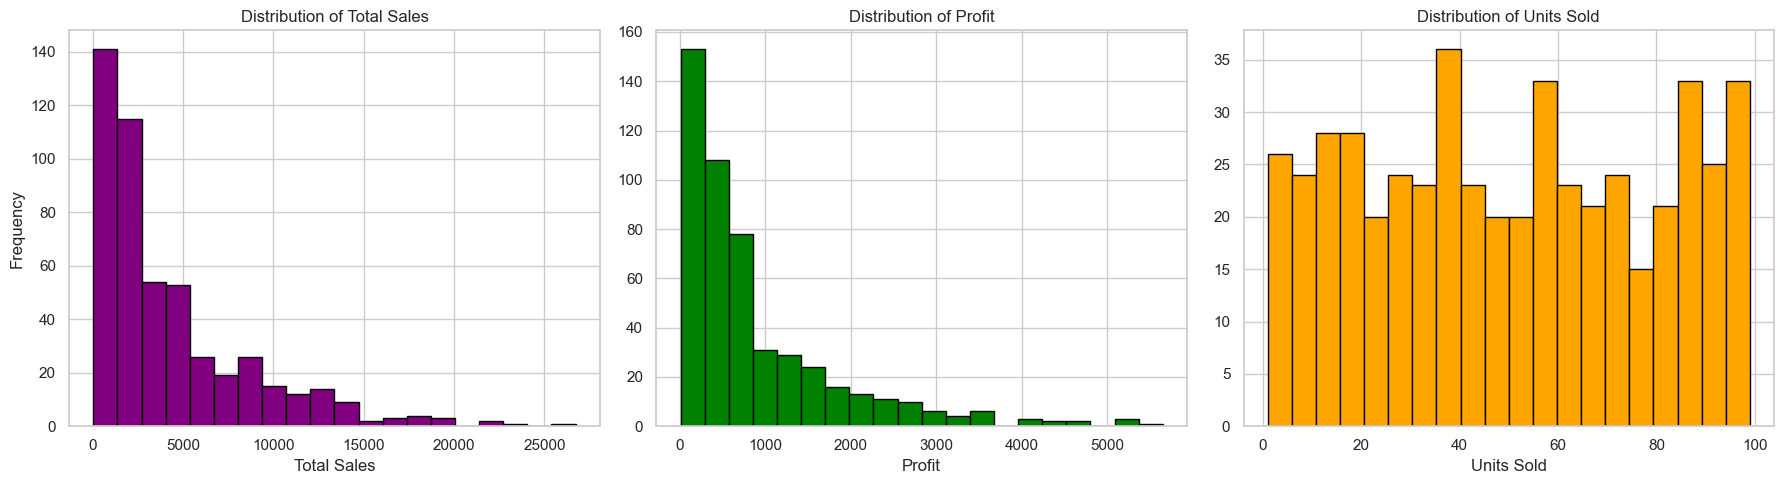

In [15]:
# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot histograms on each subplot
axes[0].hist(df['Total_Sales'], bins=20, color='purple', edgecolor='black')
axes[0].set_title('Distribution of Total Sales')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['Profit'], bins=20, color='green', edgecolor='black')
axes[1].set_title('Distribution of Profit')
axes[1].set_xlabel('Profit')

axes[2].hist(df['Units_Sold'], bins=20, color='orange', edgecolor='black')
axes[2].set_title('Distribution of Units Sold')
axes[2].set_xlabel('Units Sold')

plt.tight_layout() # Adjust subplots to give some padding.
plt.show()

#### 8. 3D Scatter Plot

*   **Description:** A 3D scatter plot visualizes the relationship between three numerical variables.
*   **Characteristics:** Adds a third dimension (z-axis) to a standard scatter plot, allowing for deeper insights into multi-dimensional data.
*   **Use Case:** Visualizing the relationship between sales, profit, and marketing spend simultaneously.

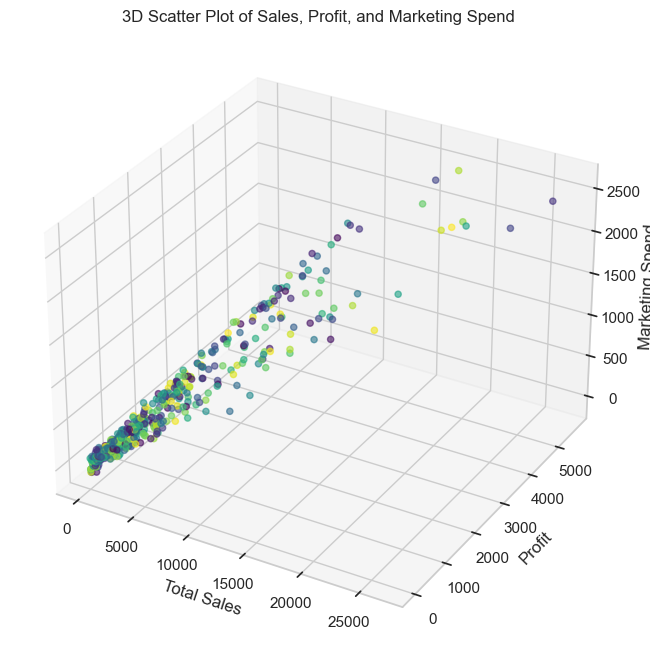

In [17]:
# Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Total_Sales'], df['Profit'], df['Marketing_Spend'], c=df['Customer_Satisfaction'], cmap='viridis', alpha=0.6)

ax.set_title('3D Scatter Plot of Sales, Profit, and Marketing Spend')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Profit')
ax.set_zlabel('Marketing Spend')

plt.show()

## Seaborn Tutorial: Statistical Data Visualization

Seaborn simplifies the creation of complex and aesthetically pleasing statistical plots.

#### 9. Enhanced Scatter Plot (`scatterplot`)

*   **Description:** Seaborn's `scatterplot` extends Matplotlib's version by easily allowing the mapping of additional variables to color, size, and style aesthetics.
*   **Characteristics:** Encodes up to four variables in a single 2D plot, revealing complex relationships.
*   **Use Case:** Analyzing the relationship between sales and profit, while also seeing how it differs across product categories (color) and regions (style).

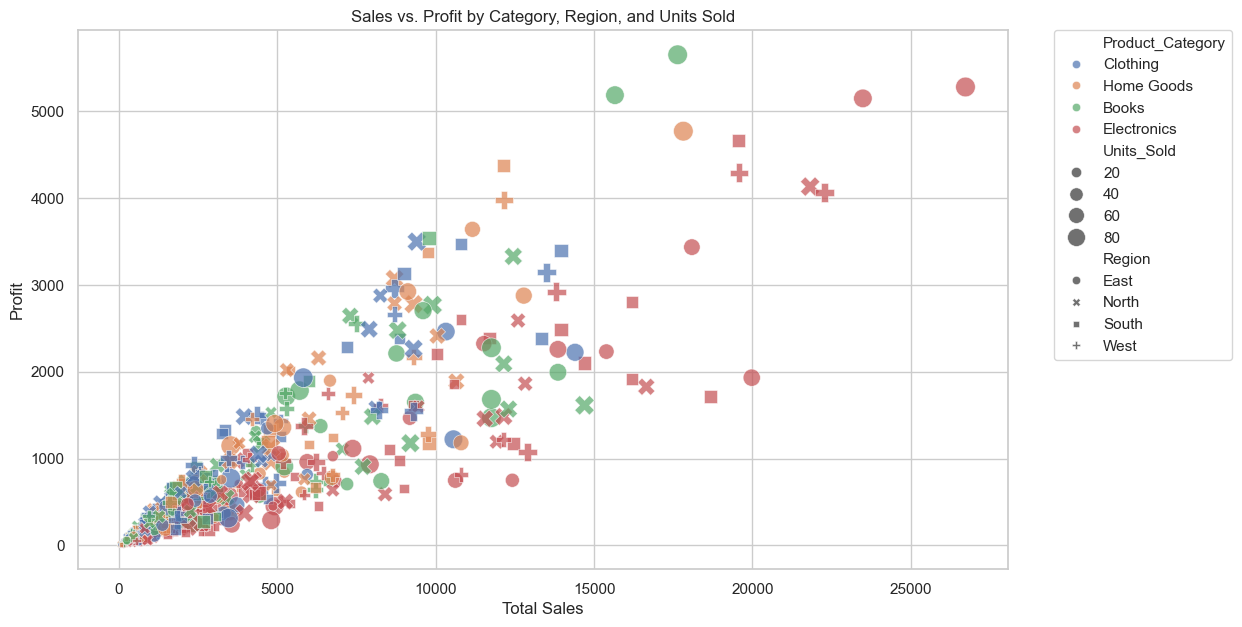

In [19]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='Total_Sales',
    y='Profit',
    hue='Product_Category', # Color points by category
    size='Units_Sold',      # Size points by units sold
    style='Region',         # Style markers by region
    alpha=0.7,
    sizes=(20, 200)
)
plt.title('Sales vs. Profit by Category, Region, and Units Sold')
plt.xlabel('Total Sales')
plt.ylabel('Profit')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### 10. Distribution Plot (`histplot` with KDE)

*   **Description:** Seaborn's `histplot` is a modern version of a histogram that can also overlay a Kernel Density Estimate (KDE) line.
*   **Characteristics:** Provides a detailed view of a variable's distribution, showing both the binned frequencies and a smoothed probability density curve.
*   **Use Case:** Getting a nuanced understanding of the profit distribution for different product categories.

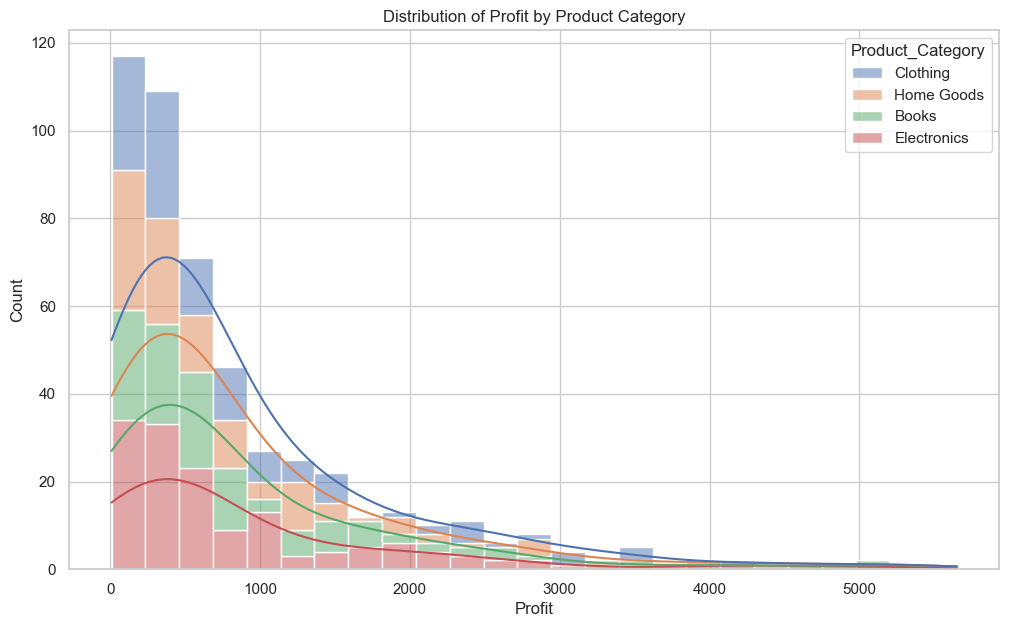

In [21]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Profit', hue='Product_Category', kde=True, multiple="stack")
plt.title('Distribution of Profit by Product Category')
plt.xlabel('Profit')
plt.ylabel('Count')
plt.show()

#### 11. Box Plot (`boxplot`)

*   **Description:** A box plot (or box-and-whisker plot) displays the five-number summary of a set of data: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.
*   **Characteristics:** Excellent for comparing distributions between multiple groups and identifying outliers.
*   **Use Case:** Comparing the distribution of customer satisfaction scores across different product categories.

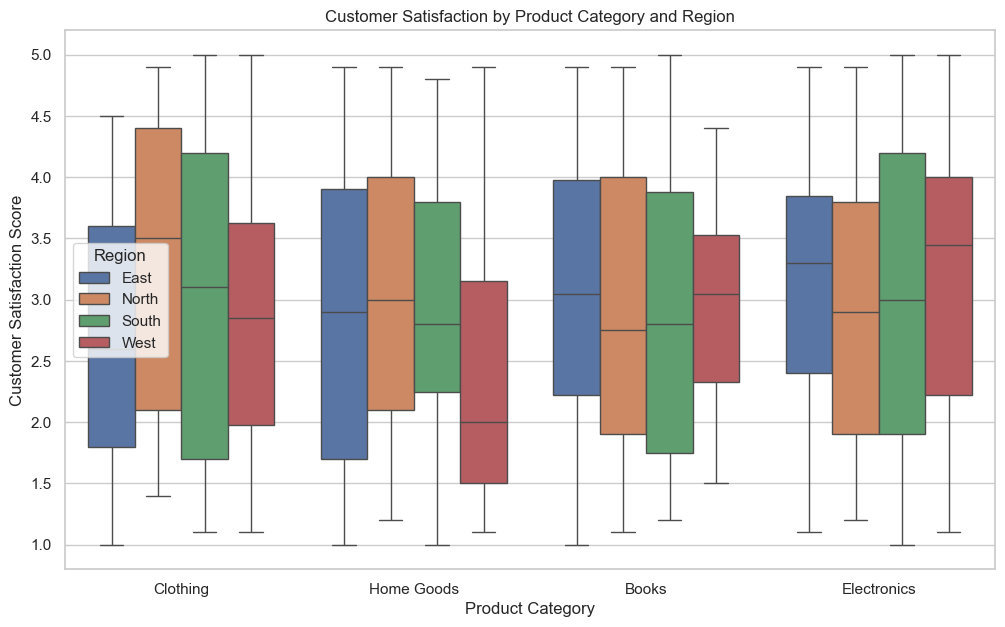

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Product_Category', y='Customer_Satisfaction', hue='Region')
plt.title('Customer Satisfaction by Product Category and Region')
plt.xlabel('Product Category')
plt.ylabel('Customer Satisfaction Score')
plt.show()

#### 12. Violin Plot (`violinplot`)

*   **Description:** A violin plot combines a box plot with a KDE. The "violin" shape shows the probability density of the data at different values.
*   **Characteristics:** Provides a much richer understanding of the distribution's shape than a box plot alone.
*   **Use Case:** Comparing sales distributions across regions, showing not just the quartiles but also the density of sales values.

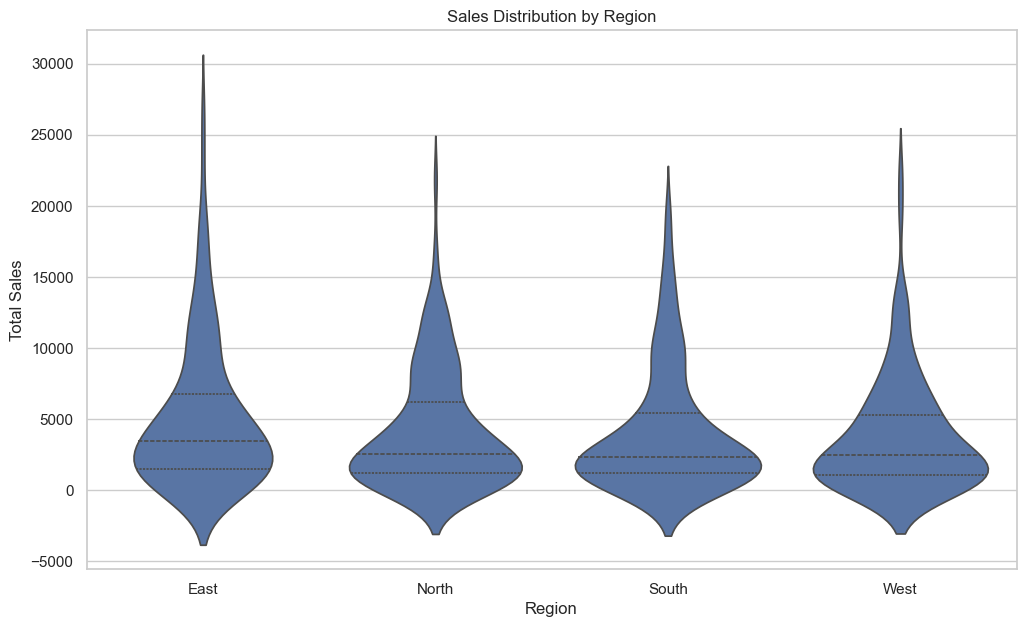

In [25]:
plt.figure(figsize=(12, 7))
sns.violinplot(data=df, x='Region', y='Total_Sales', inner='quartile')
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

#### 13. Swarm Plot (`swarmplot`)

*   **Description:** A swarm plot is a categorical scatter plot where the points are adjusted to not overlap.
*   **Characteristics:** Shows the distribution of data points for each category while avoiding overlap, giving a sense of density and individual values. It works best for smaller datasets.
*   **Use Case:** Visualizing the exact distribution of units sold for each product category without losing information about individual data points.

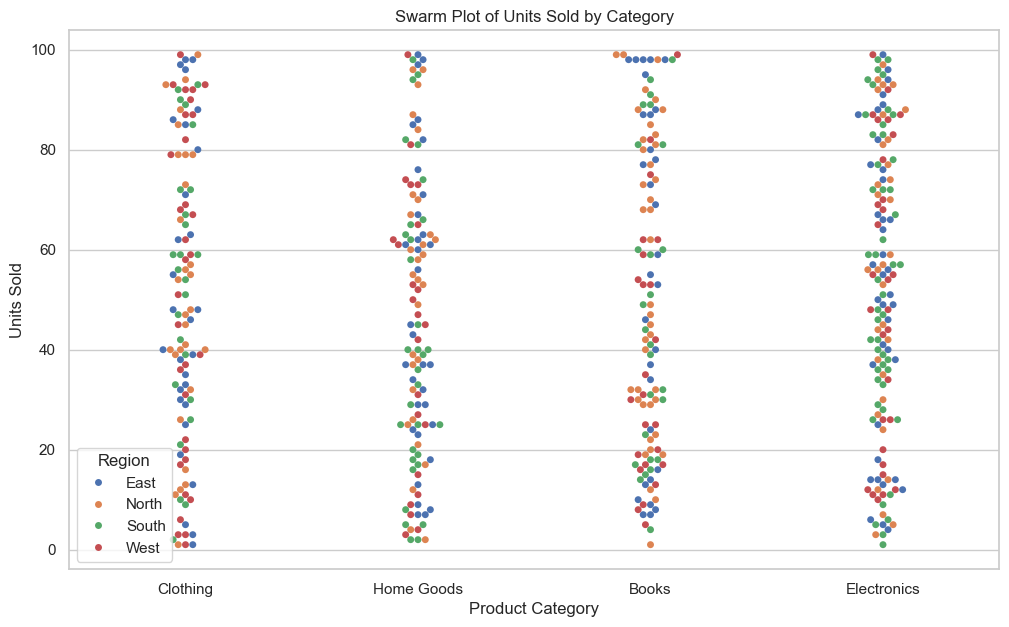

In [27]:
plt.figure(figsize=(12, 7))
sns.swarmplot(data=df, x='Product_Category', y='Units_Sold', hue='Region')
plt.title('Swarm Plot of Units Sold by Category')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.show()

#### 14. Count Plot (`countplot`)

*   **Description:** A count plot is essentially a histogram across a categorical variable instead of a quantitative variable.
*   **Characteristics:** Shows the number of occurrences of each item in a categorical column.
*   **Use Case:** Quickly counting the number of sales transactions per region.

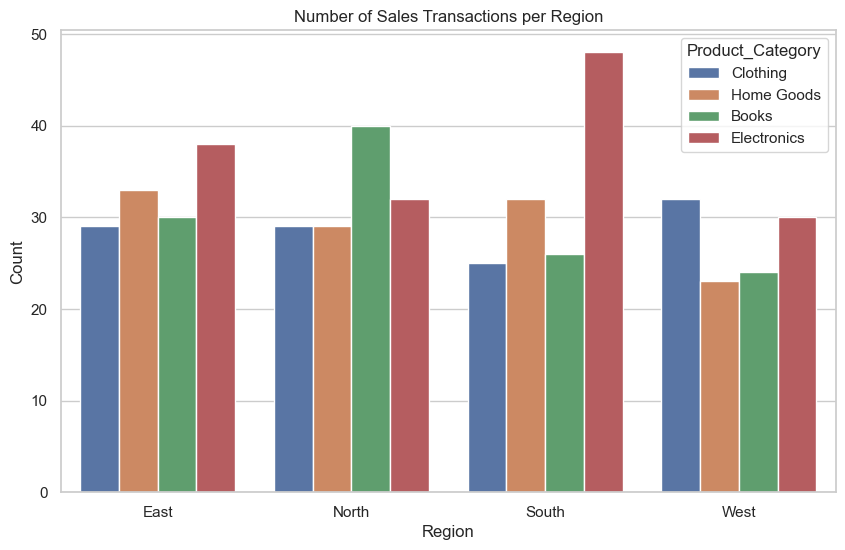

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Region', hue='Product_Category')
plt.title('Number of Sales Transactions per Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

#### 15. Heatmap

*   **Description:** A heatmap is a graphical representation of data where values are depicted by color.
*   **Characteristics:** Excellent for showing the relationship between two variables or displaying the magnitude of a phenomenon in a matrix.
*   **Use Case:** Visualizing the correlation matrix of numerical variables in the dataset to quickly identify strong relationships.

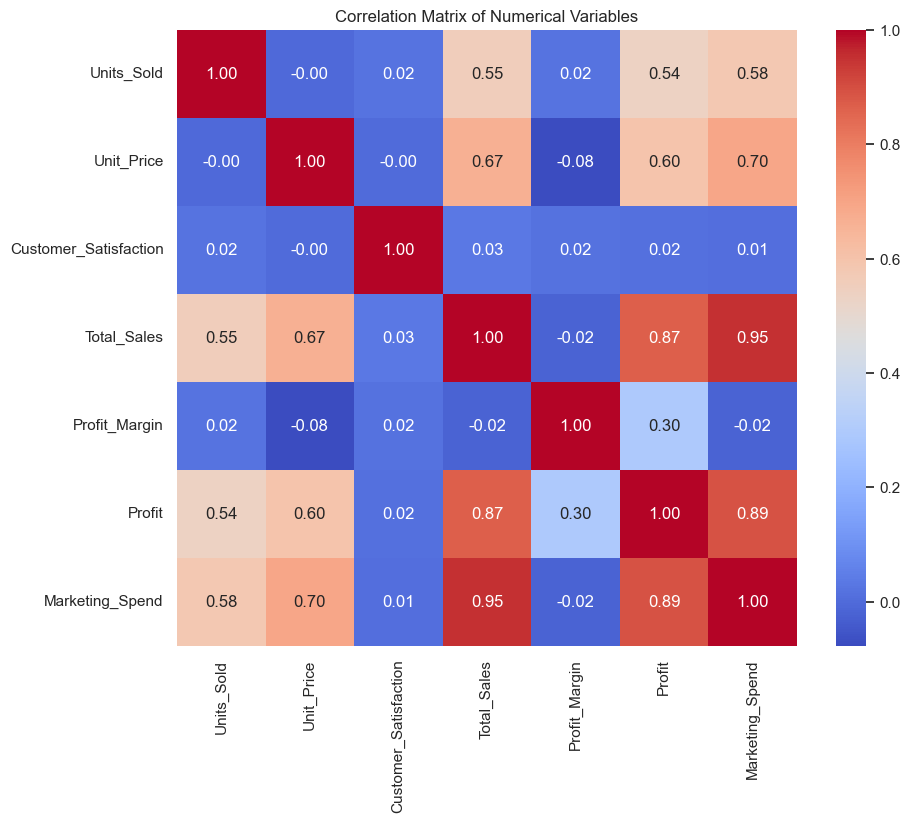

In [31]:
# Select only numeric columns for correlation matrix
numeric_df = df[['Units_Sold', 'Unit_Price', 'Customer_Satisfaction', 'Total_Sales', 'Profit_Margin', 'Profit', 'Marketing_Spend']]
corr_matrix = numeric_df.corr()

# Create the plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

#### 16. Linear Model Plot (`lmplot`)

*   **Description:** The `lmplot` function combines a scatter plot with a linear regression model fit. It is a figure-level function that uses `FacetGrid` internally.
*   **Characteristics:** Visualizes the linear relationship between two variables and can create faceted plots across different categories.
*   **Use Case:** Examining the relationship between marketing spend and profit, faceted by product category and region, to see if the trend is consistent.

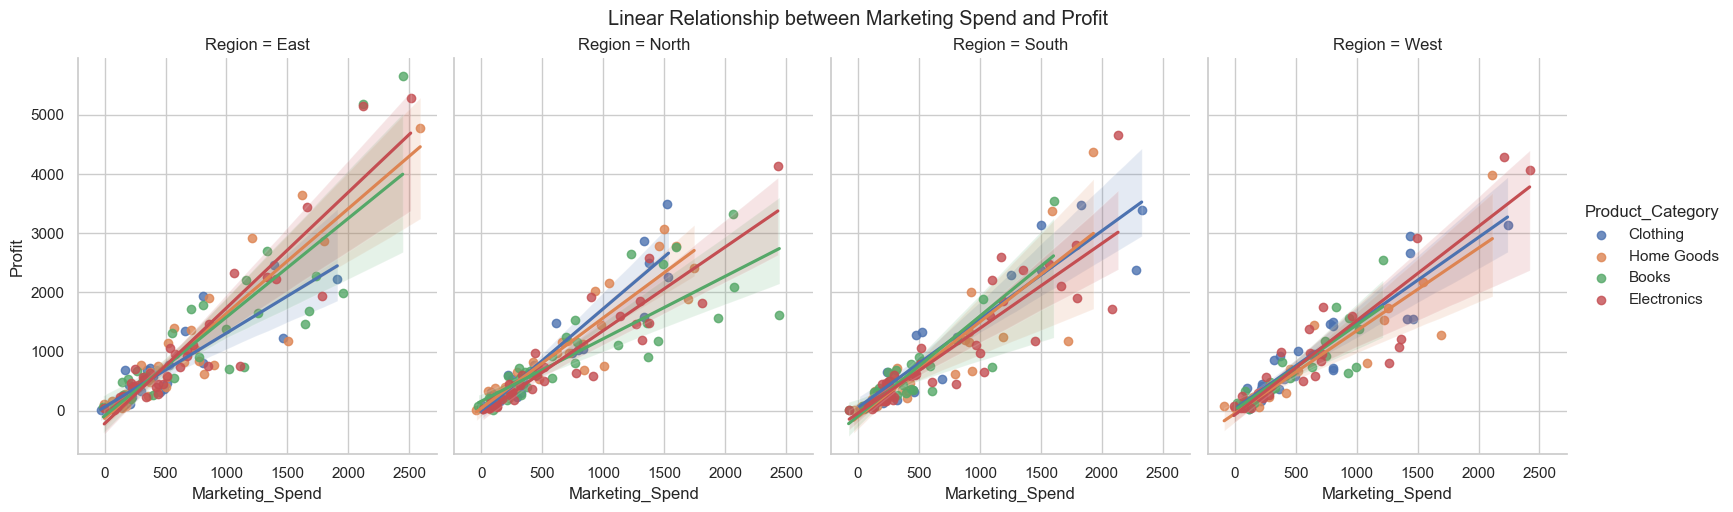

In [33]:
sns.lmplot(
    data=df,
    x='Marketing_Spend',
    y='Profit',
    hue='Product_Category',
    col='Region', # Create columns for each region
    height=5,
    aspect=0.8
)
plt.suptitle('Linear Relationship between Marketing Spend and Profit', y=1.02)
plt.show()

#### 17. Joint Plot (`jointplot`)

*   **Description:** A joint plot creates a multi-panel figure that shows the bivariate relationship between two variables along with their univariate distributions on the margins.
*   **Characteristics:** Provides a comprehensive view of the relationship between two variables, including their individual distributions.
*   **Use Case:** A deep dive into the relationship between total sales and profit, showing the scatter plot, a regression line, and histograms for each variable. You can change `kind` to `"hex"` for a 2D histogram or `"kde"` for a 2D density plot.

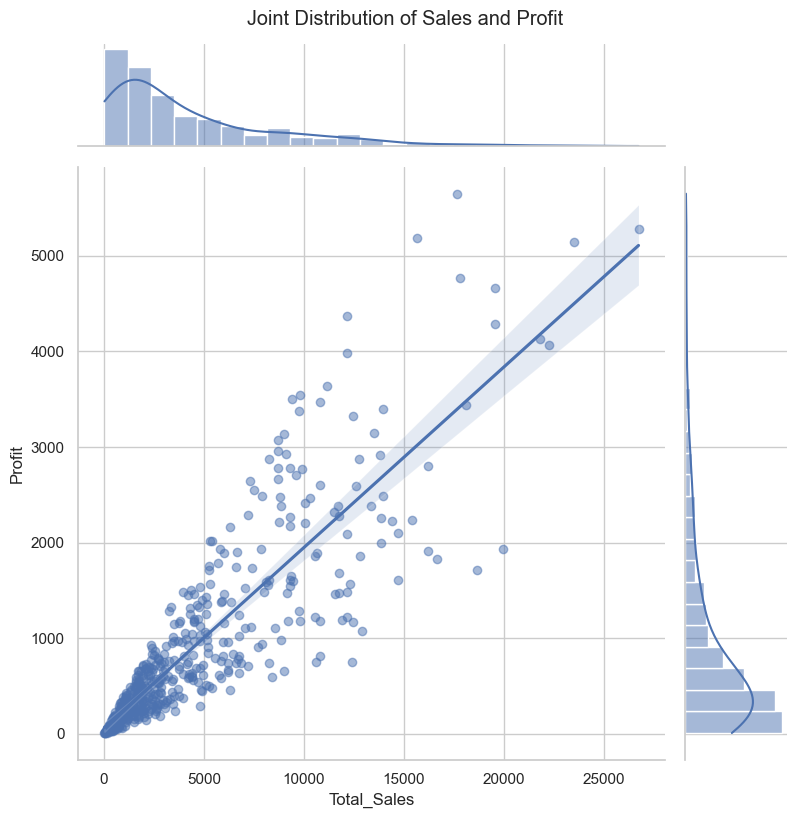

In [34]:
sns.jointplot(data=df, x='Total_Sales', y='Profit', kind='reg', # 'reg' adds a regression line
              height=8, scatter_kws={'alpha': 0.5})
plt.suptitle('Joint Distribution of Sales and Profit', y=1.02)
plt.show()

#### 18. Pair Plot (`pairplot`)

*   **Description:** A pair plot, also known as a scatter plot matrix, creates a grid of axes such that each numerical variable in the data is shared across the y-axes on a single row and the x-axes on a single column.
*   **Characteristics:** Provides a quick, comprehensive overview of the pairwise relationships between all numerical variables in a dataset. The diagonal shows the univariate distribution of each variable.
*   **Use Case:** An essential exploratory tool to understand the relationships between all numerical features at once.

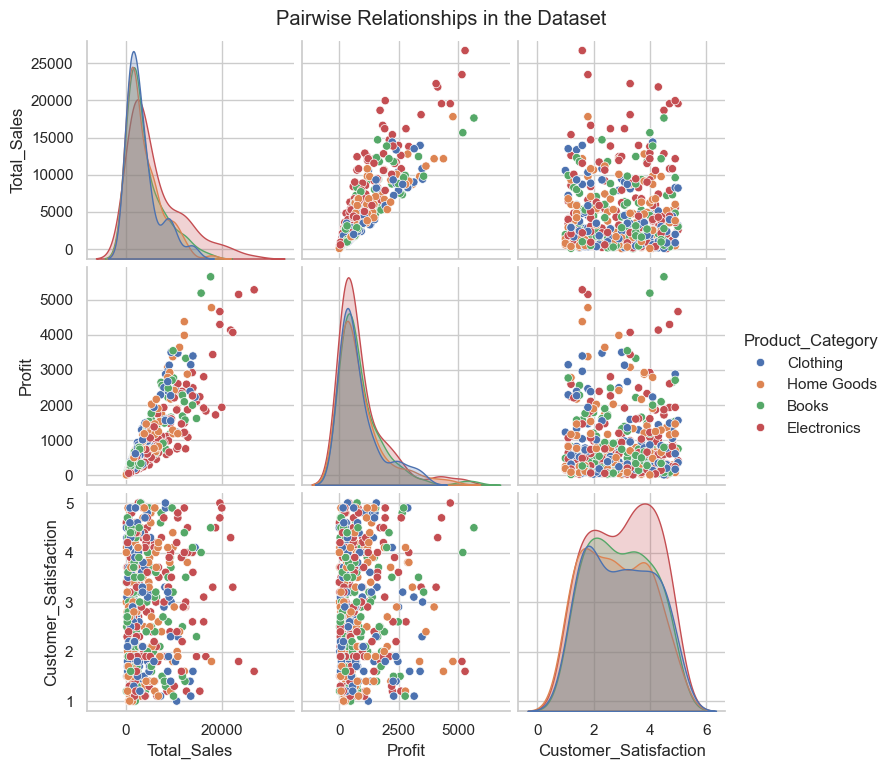

In [35]:
# Using a subset of columns for clarity
subset_df = df[['Total_Sales', 'Profit', 'Customer_Satisfaction', 'Product_Category']]
sns.pairplot(subset_df, hue='Product_Category', diag_kind='kde')
plt.suptitle('Pairwise Relationships in the Dataset', y=1.02)
plt.show()

#### 19. FacetGrid

*   **Description:** `FacetGrid` is a powerful tool for creating a matrix of plots based on the values of different categorical variables. You initialize the grid and then map a plotting function to it.
*   **Characteristics:** Highly flexible way to create conditional plots, allowing you to visualize a relationship under various conditions.
*   **Use Case:** Visualizing the distribution of customer satisfaction scores, faceted by both region (rows) and product category (columns).

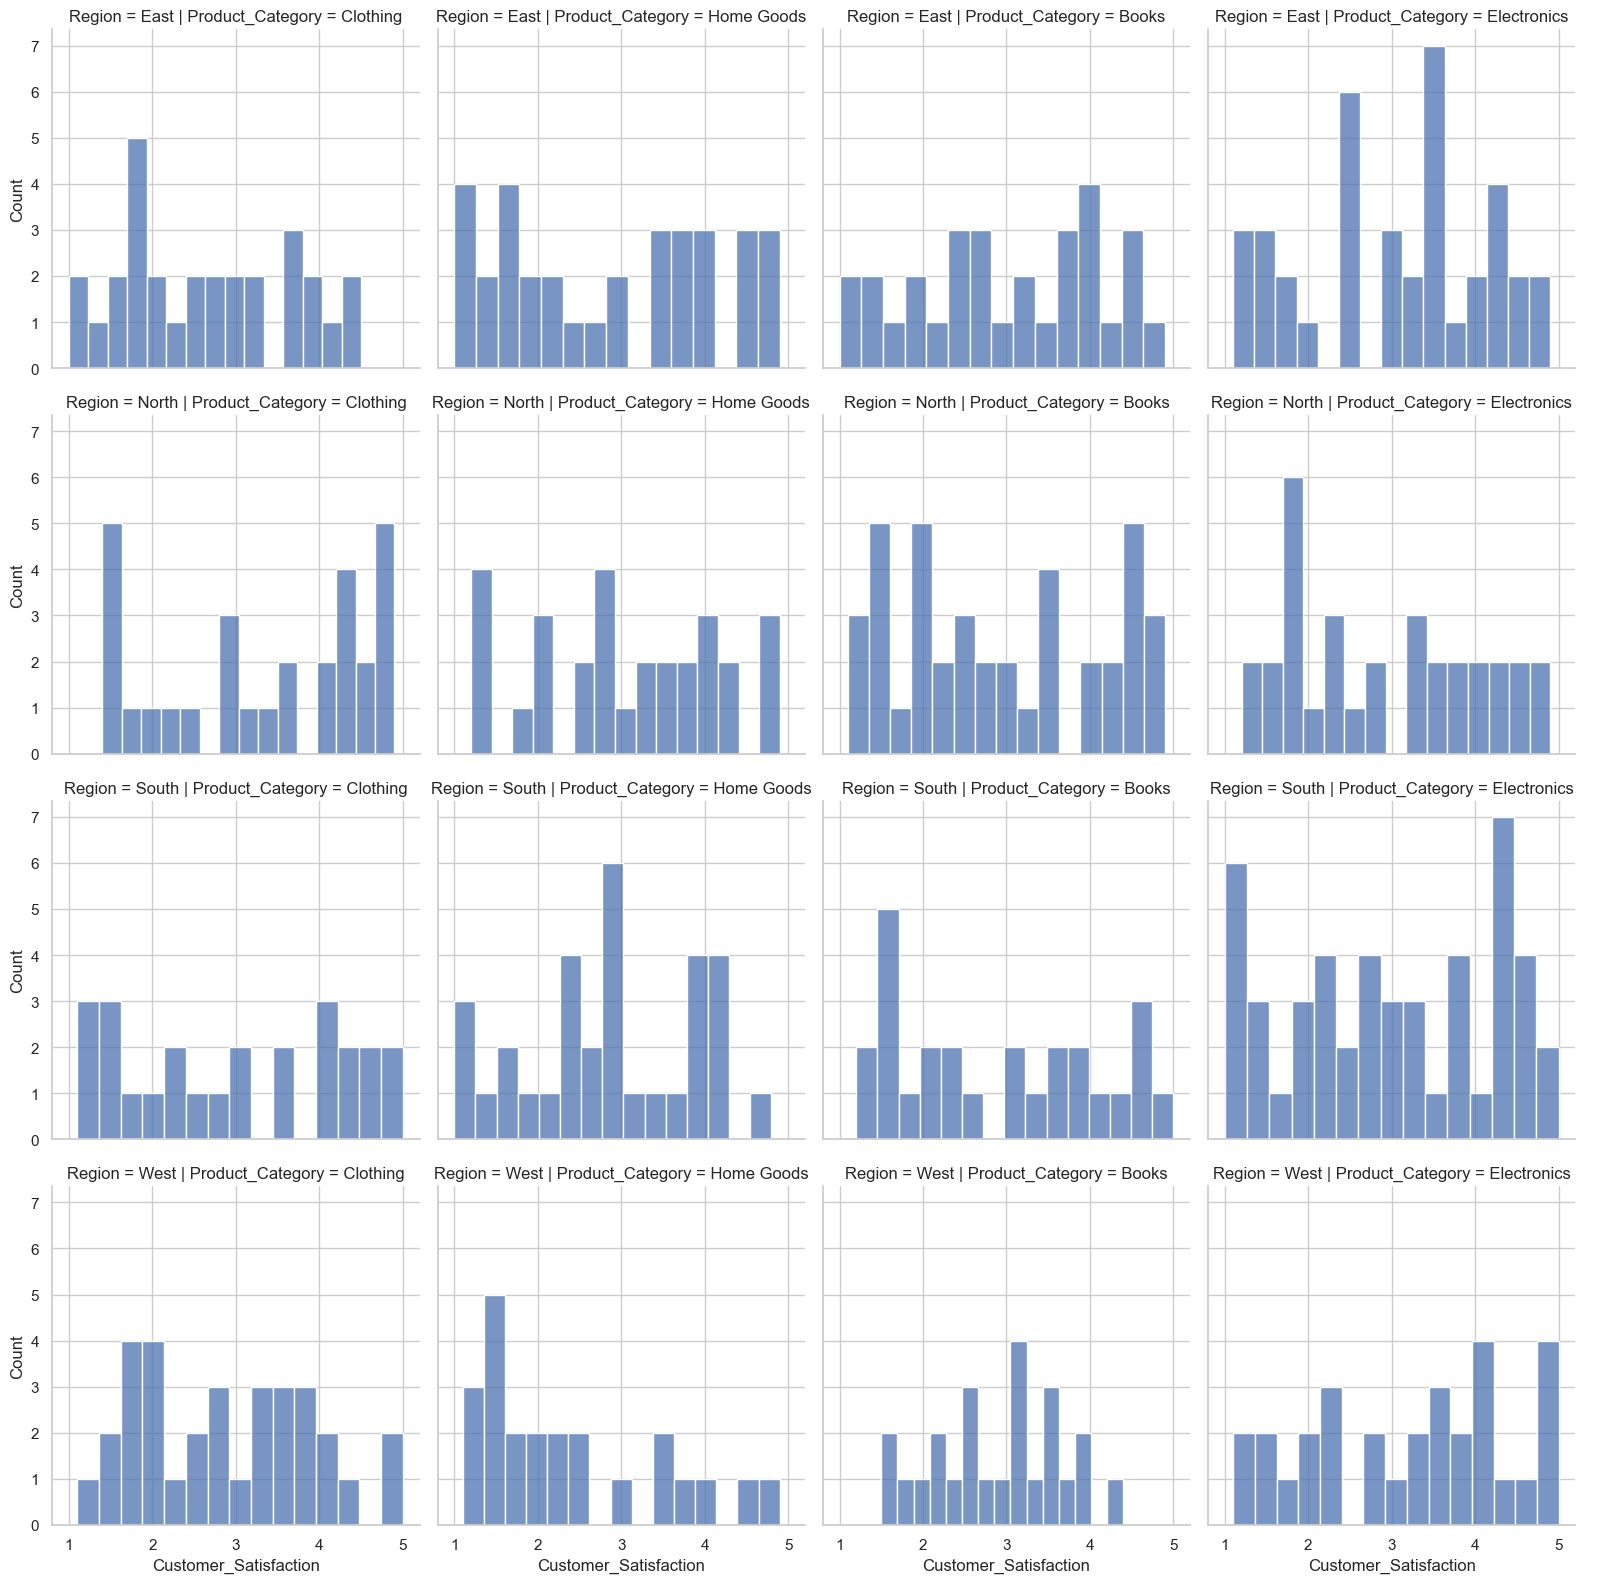

In [41]:
g = sns.FacetGrid(df, col="Product_Category", row="Region", height=4, aspect=1)
g.map(sns.histplot, "Customer_Satisfaction", bins=15)
g.add_legend()
plt.show()

#### 20. Point Plot (`pointplot`)

*   **Description:** A point plot represents an estimate of central tendency for a numerical variable with the height of each point and provides some indication of the uncertainty around that estimate using error bars.
*   **Characteristics:** Focuses on showing changes or comparisons of means between different categorical groups. It's useful for showing interactions.
*   **Use Case:** Comparing the average customer satisfaction across different product categories, clearly showing the mean and confidence interval for each.

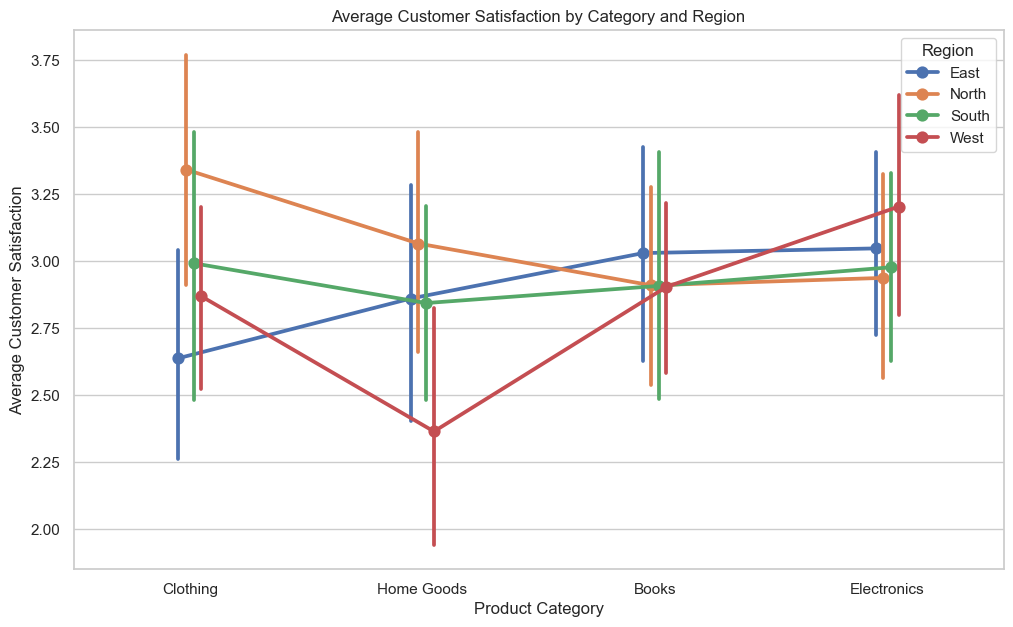

In [39]:
plt.figure(figsize=(12, 7))
sns.pointplot(data=df, x='Product_Category', y='Customer_Satisfaction', hue='Region', dodge=True)
plt.title('Average Customer Satisfaction by Category and Region')
plt.xlabel('Product Category')
plt.ylabel('Average Customer Satisfaction')
plt.show()

#### 21. Empirical Cumulative Distribution Plot (`ecdfplot`)

*   **Description:** An ECDF plot shows the proportion of data points that are less than or equal to a given value. It represents the cumulative distribution function.
*   **Characteristics:** Provides a detailed, non-parametric view of a distribution without binning bias. Each step in the plot represents one observation.
*   **Use Case:** Comparing the cumulative distribution of total sales across different regions to see which region has consistently higher sales values.

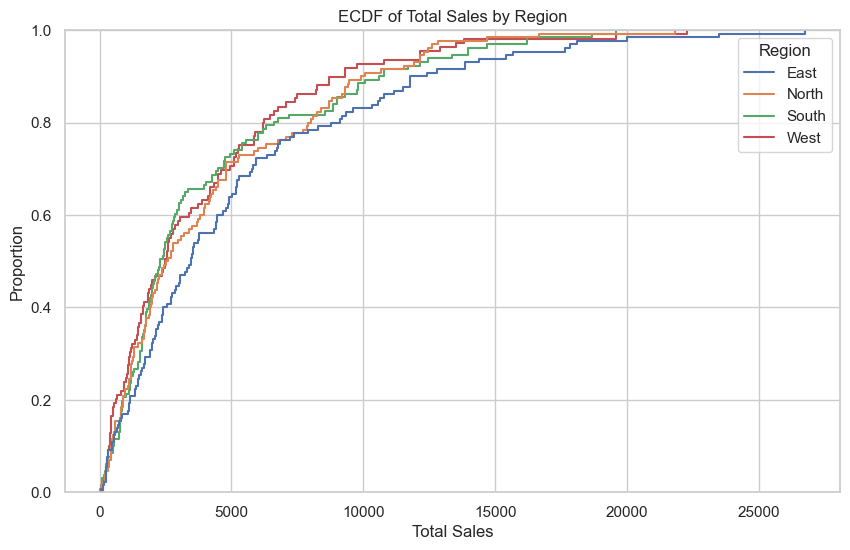

In [44]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='Total_Sales', hue='Region')
plt.title('ECDF of Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Proportion')
plt.show()

#### 22. Rug Plot (`rugplot`)

*   **Description:** A rug plot draws a small vertical tick at each observation's location along an axis.
*   **Characteristics:** A very simple plot that can be used to augment other plots by showing the precise location of individual data points.
*   **Use Case:** Adding to a KDE plot to show both the smoothed density and the exact locations of the underlying data points.

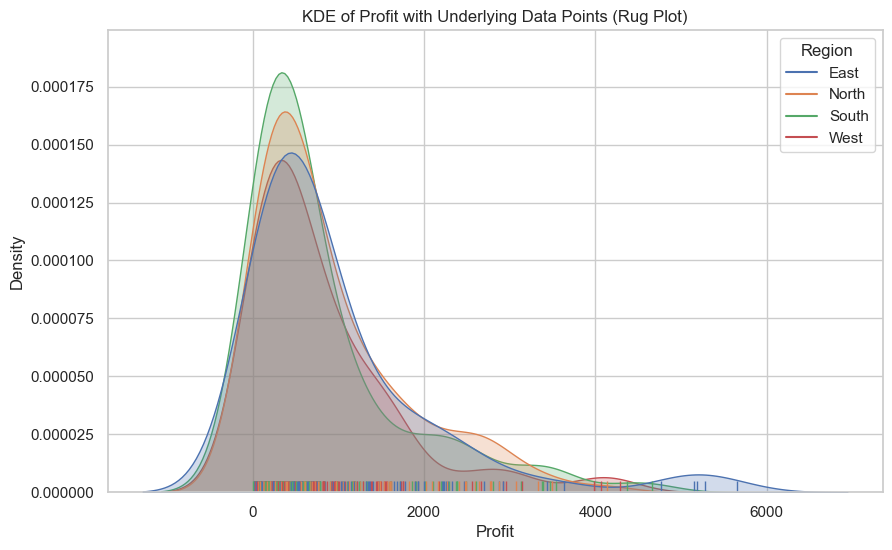

In [46]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Profit', hue='Region', fill=True)
sns.rugplot(data=df, x='Profit', hue='Region')
plt.title('KDE of Profit with Underlying Data Points (Rug Plot)')
plt.xlabel('Profit')
plt.show()

#### 23. Cluster Map (`clustermap`)

*   **Description:** A clustermap combines a heatmap with hierarchical clustering. It reorders the rows and columns of the heatmap so that similar rows and similar columns are placed near each other.
*   **Characteristics:** Reveals clusters or subgroups within the data that might not be apparent otherwise. Dendrograms on the rows and columns show the hierarchical clustering.
*   **Use Case:** Clustering products and customers based on purchasing behavior to identify distinct market segments. Here, we use our correlation matrix.

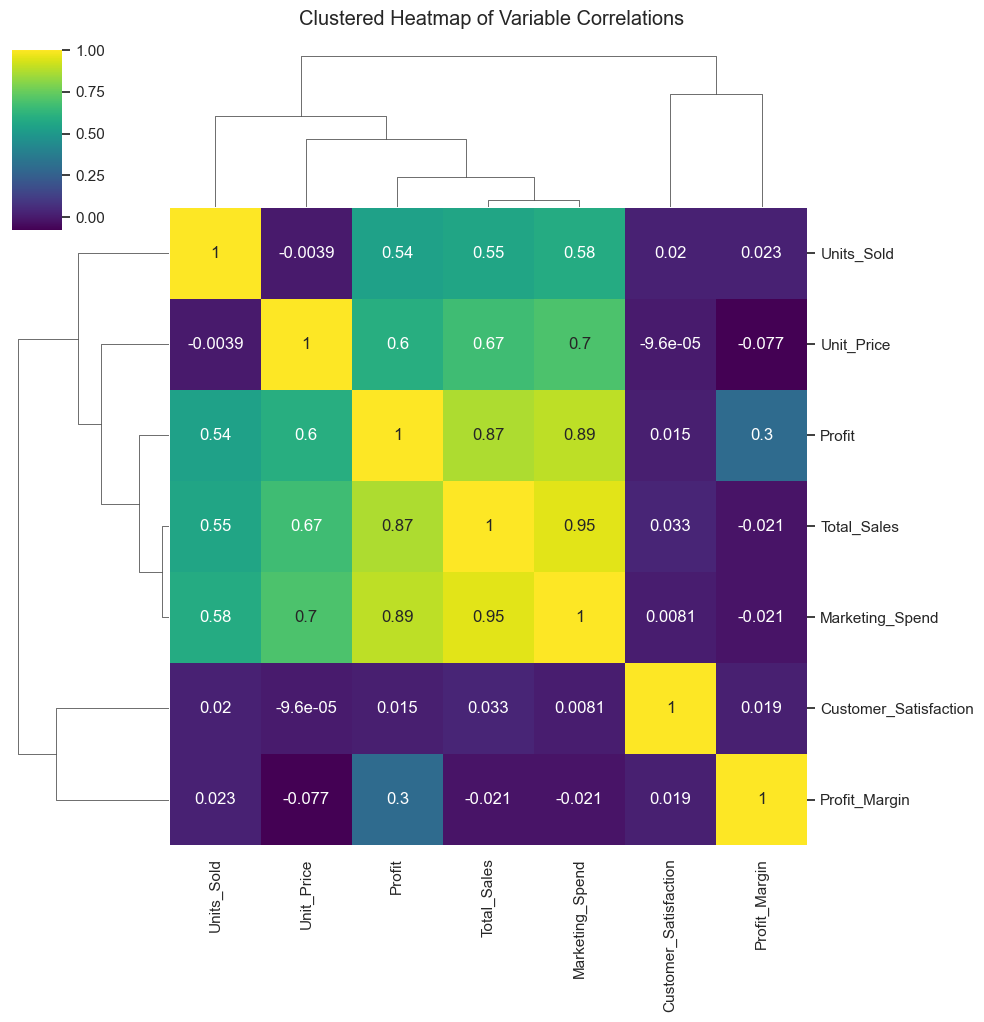

In [48]:
# Use the correlation matrix from the heatmap example
numeric_df = df[['Units_Sold', 'Unit_Price', 'Customer_Satisfaction', 'Total_Sales', 'Profit_Margin', 'Profit', 'Marketing_Spend']]
corr_matrix = numeric_df.corr()

sns.clustermap(corr_matrix, annot=True, cmap='viridis', figsize=(10, 10))
plt.suptitle('Clustered Heatmap of Variable Correlations', y=1.02)
plt.show()

#### 24. Boxen Plot (`boxenplot`)

*   **Description:** The boxen plot (or letter-value plot) is an enhancement of the box plot. It draws a larger number of "quartiles," providing more detail about the shape of the distribution, especially in the tails.
*   **Characteristics:** More robust for larger datasets than a standard box plot, showing more quantiles and giving a better sense of the distribution's shape.
*   **Use Case:** Visualizing the distribution of a large number of sales transactions to get a more detailed picture than a standard box plot would provide.

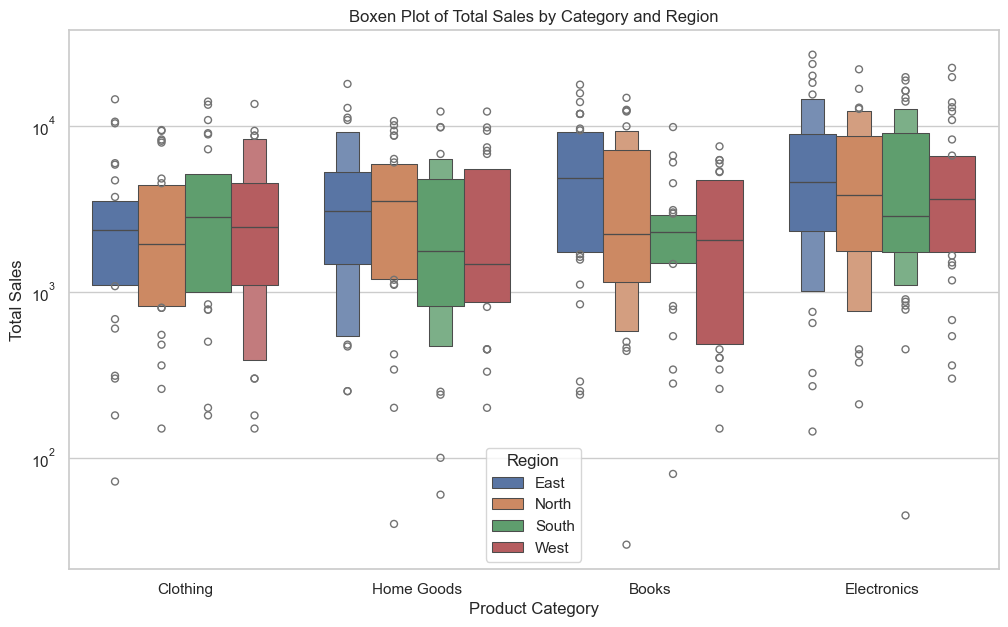

In [50]:
plt.figure(figsize=(12, 7))
sns.boxenplot(data=df, x='Product_Category', y='Total_Sales', hue='Region')
plt.title('Boxen Plot of Total Sales by Category and Region')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.yscale('log') # Use log scale for better visibility of distributions
plt.show()

#### 25. Ridge Plot (`FacetGrid` with KDE)

*   **Description:** A ridge plot (or joyplot) uses overlapping density plots to visualize the distribution of a variable across several categories. It's an effective way to compare distributions. While Seaborn doesn't have a dedicated `ridgeplot` function, it can be easily created with `FacetGrid`.
*   **Characteristics:** Visually appealing and effective at showing differences in distributions between many groups.
*   **Use Case:** Comparing the distribution of customer satisfaction scores across all product categories simultaneously.

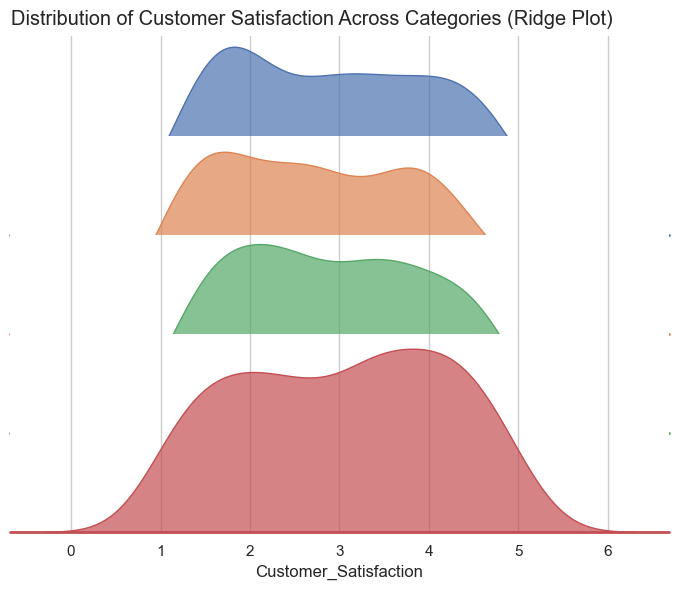

In [52]:
# Create the FacetGrid
g = sns.FacetGrid(df, row="Product_Category", hue="Product_Category", aspect=5, height=1.5)

# Map the density plots
g.map(sns.kdeplot, "Customer_Satisfaction", fill=True, alpha=0.7)

# Add a white line at the bottom of each plot
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Set titles and clean up the plot
g.fig.subplots_adjust(hspace=-0.5)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.suptitle('Distribution of Customer Satisfaction Across Categories (Ridge Plot)', y=0.98)
plt.show()